In [ ]:
!pip install matplotlib mysql-connector-python openpyxl

In [2]:
import subprocess
import re
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [20]:
# Funcion para medir el ping a través de un subproceso

def medir_ping(host,count):
    ping_output = subprocess.run(
        ["ping", "-c",str(count), host],capture_output=True,text=True
    )

    ping_times = re.findall(r"time=(\d+\.\d+)",ping_output.stdout)
    
    return list(map(float,ping_times))


#tiempo_ping = medir_ping(host_test,10)
#[22.401, 18.037, 17.588, 36.65, 17.619, 20.051, 17.688, 20.033, 17.613, 22.042]

In [19]:
# Función para graficar el tiempo

def graficar_ping(host,ping_times):
    plt.plot(ping_times)
    plt.title(f"Ping a {host}")
    plt.xlabel("Número de ping")
    plt.ylabel("Tiempo de respuesta (ms)")
    plt.show()

In [12]:
# Función para insertar datos en la base de datos mysql
def insertar_en_mysql(host, ping_times):
    conn = mysql.connector.connect(
        host="localhost", 
        user="root", 
        password="root", 
        database="diccionario_db"
    )

    cursor = conn.cursor()

    cursor.execute("CREATE TABLE IF NOT EXISTS ping_data (id_ping_data INT AUTO_INCREMENT PRIMARY KEY, timestamp DATETIME, host VARCHAR(255), ping_time FLOAT)")

    # Insertar datos en la base de datos

    for ping_time in ping_times:
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        insert_query = ("INSERT INTO ping_data (timestamp,host,ping_time) VALUES (%s,%s,%s)")

        cursor.execute(insert_query,(timestamp,host,ping_time))

    conn.commit()
    cursor.close()
    conn.close()

In [6]:
# Función para crear el excel

def crear_excel(ping_times):
    df = pd.DataFrame({"Ping":ping_times})
    df.to_excel("ping_data.xlsx", index=False)

In [17]:
# Configuración
host = input("dame el dominio")
ping_count = 10

dame el dominio www.facebook.com


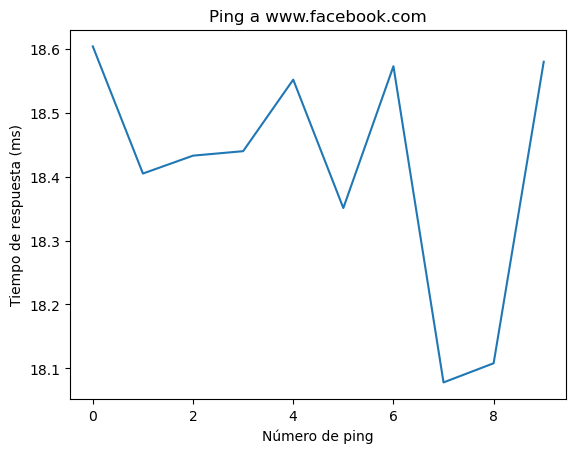

In [21]:
# Funciones ejecutadas

#medir ping
ping_times = medir_ping(host,ping_count)

# graficar ping
graficar_ping(host,ping_times)

# insertar a la base de datos
insertar_en_mysql(host,ping_times)

# crear EXCEl

crear_excel(ping_times)